# NumPy vs CuPy Benchmarks
This notebook investigates the performance improvements between the numpy and cupy libraries. The hardware used is state of the art components from top vendors.
## Hardware:
**CPU:** Intel Core i9-12900K <br>
**GPU:** NVIDIA Geforce RTX 3080 

In [10]:
# Importing Libraries 
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import time

In [31]:
# Benchmarking Functions
def numpyBench(sz=10000):
    # Main Computation 
    a = np.ones((sz,sz))
    b = a*a
    ts = time.time()
    # Freeing Memory
    del a,b
    return ts

def cupyBench(sz=10000):
    # Main Computation
    a = cp.ones((sz,sz))
    b = a*a
    ts = time.time()
    # Freeing Memory 
    del a,b
    cp._default_memory_pool.free_all_blocks()
    return ts

In [77]:
# Size of Square Matrix N
szs = [(10**i)+(10**(i))*j for i in range(5) for j in range(9)]
szs = [sz for sz in szs if sz<30000]

# Empty Lists of Times (Corresponding to szs)
cpuTimes = []
gpuTimes = []

In [78]:
# Benchmark
for sz in szs: 
    start = time.time()
    cpuTimes.append(numpyBench(sz=sz)-start)
    start = time.time()
    gpuTimes.append(cupyBench(sz=sz)-start)

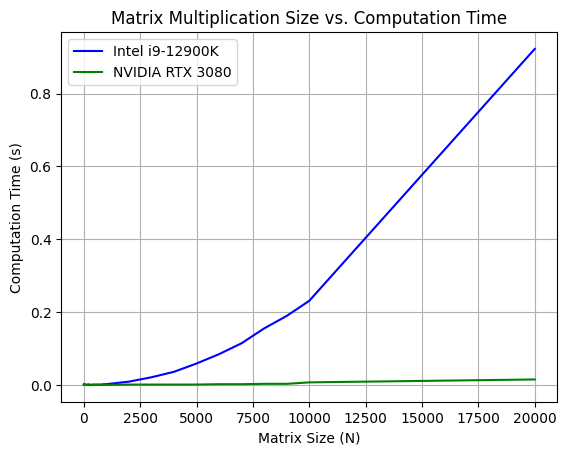

In [80]:
# Plot the Results
plt.figure()
plt.plot(szs,cpuTimes,'blue')
plt.plot(szs,gpuTimes,'green')
plt.grid()
xlabel = plt.xlabel('Matrix Size (N)')
ylabel = plt.ylabel('Computation Time (s)')
xscale = plt.xscale('linear')
yscale = plt.yscale('linear')
title = plt.title('Matrix Multiplication Size vs. Computation Time')
legend = plt.legend(['Intel i9-12900K','NVIDIA RTX 3080'])